In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import locale
locale.setlocale( locale.LC_ALL, "en_US.UTF-8")

### Load file and get series
movie = pd.read_csv("../Resources/US_movies_cleanup.csv")
movie.drop(columns = ["Unnamed: 0"], inplace=True)
### Drop all NaN based on Box Office
movie.dropna(subset=["Box Office"], how='all', inplace = True)

Director = movie["Director"].tolist()        
BoxOffice= movie["Box Office"].tolist() 
L = len(BoxOffice)

In [4]:
### Load Directors counts and get top20
movie_director = pd.read_csv("../Resources/US_movies_Director.csv")
movie_director.sort_values(by=["Director Counts"], ascending=False, inplace= True)
# movie_director.head()
Director_top20 = movie_director[1:21].copy()["Director"].tolist()
Director_count_top20 = movie_director[1:21].copy()["Director Counts"].tolist()

In [5]:
### Get BoxOffice by Director
BoxOffice_by_Director = np.zeros(20)
D = len(Director_top20)
for d in range(D):
    director = Director_top20[d]
    for l in range(L):
        Director_type  = Director[l] 
        try:
            if director in Director_type:
                BoxOffice_num = locale.atof(BoxOffice[l].strip("$"))
                BoxOffice_by_Director[d] = BoxOffice_by_Director[d]+BoxOffice_num
        except Exception:
            print("There is no director for movie")
BoxOffice_million =  BoxOffice_by_Director/1e6

There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie
There is no director for movie


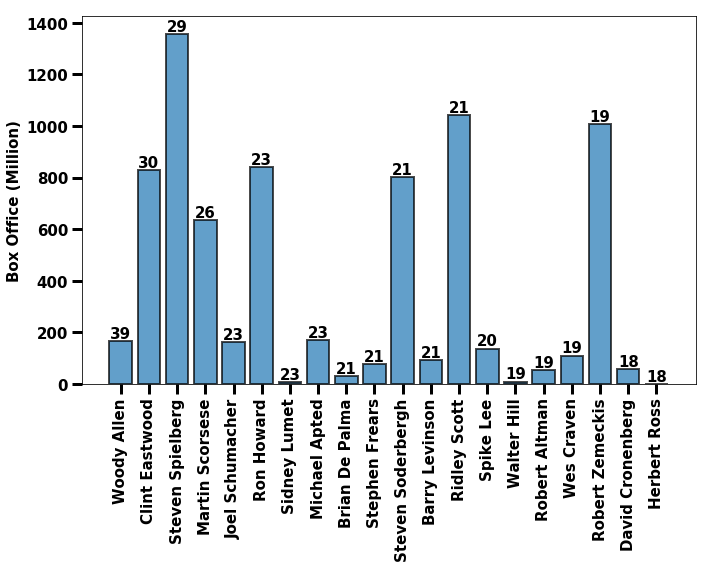

In [13]:
### Plot Figure
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(range(D), BoxOffice_million, alpha=0.7, edgecolor="k", lw=2)

rects = ax.patches
for rect, label in zip(rects, Director_count_top20):
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2, height, 
            int(np.round(label)),
            ha='center', va='bottom', fontsize=15, weight="bold")
    
plt.xticks(range(D), Director_top20, fontsize=15, weight="bold", rotation=90)
plt.yticks(np.arange(0,1500,200), fontsize=15, weight="bold")
plt.ylabel("Box Office (Million)", fontsize=15, weight="bold")

ax.xaxis.set_tick_params(width=3, size=10)
ax.yaxis.set_tick_params(width=3, size=10)

plt.tight_layout()
plt.savefig("../Figures/Movie_Director_BoxOffice_BarPlot.png")
plt.show()